# Simulation
#### Yi Lian

##### Why?
To test whether a method works or not.

In [1]:
# Sample mean to estimate population mean
n <- 10000
sample.normal <- rnorm(n, mean = 2, sd = 1)
mean(sample.normal)

[1] 2.001143

##### When does a method work?
Statistical models such as linear regression models work under assumptions.
$$ y_i=\beta_0+\beta_1x_i + \epsilon_i$$
$$ \epsilon_1, \epsilon_2, \dots, \epsilon_n \sim i.i.d,\ \mathbb{E}(\epsilon_i)=0,\ \boldsymbol{X} \perp \!\!\! \perp \boldsymbol{\epsilon}$$
Linear regression model estimates $\beta_0$ and $\beta_1$.

##### How?
1. Fix $\beta_0$ and $\beta_1$
2. Generate some random $\boldsymbol{X}$
3. Generate some random $\boldsymbol{\epsilon}$
4. Calculate $\boldsymbol{Y}$
5. Fit linear regression models to estimate $\beta_0$ and $\beta_1$

##### If model is correct, we should get estimates that are close to the true values we set in step 1.
The bigger the simulated data is, the closer should we get to the true values.

## Example

Estimating $\pi$ with really crude perimeter measures.

1. Draw a bunch of circles with diameters equal to 1, 2, 3, ... centimeters
2. Measure the perimeters with a really crude method. Results are rounded to the closest integer cm.

In this case, roughly $\epsilon_i \sim_{i.i.d} \mathrm{Unif(-0.5,0.5)}$

In [2]:
# 1. fix a target parameter pi
pi

[1] 3.141593

In [3]:
# 2. Generate some random X's
X <- seq(1, 5, by = 0.1)
head(X, 10)

[1] 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9

In [4]:
# True Y
head(pi*X, 10)

[1] 3.141593 3.455752 3.769911 4.084070 4.398230 4.712389 5.026548 5.340708
 [9] 5.654867 5.969026

In [5]:
# 3-4 Generate Y
Y <- round(pi*X)
head(Y, 10)

[1] 3 3 4 4 4 5 5 5 6 6

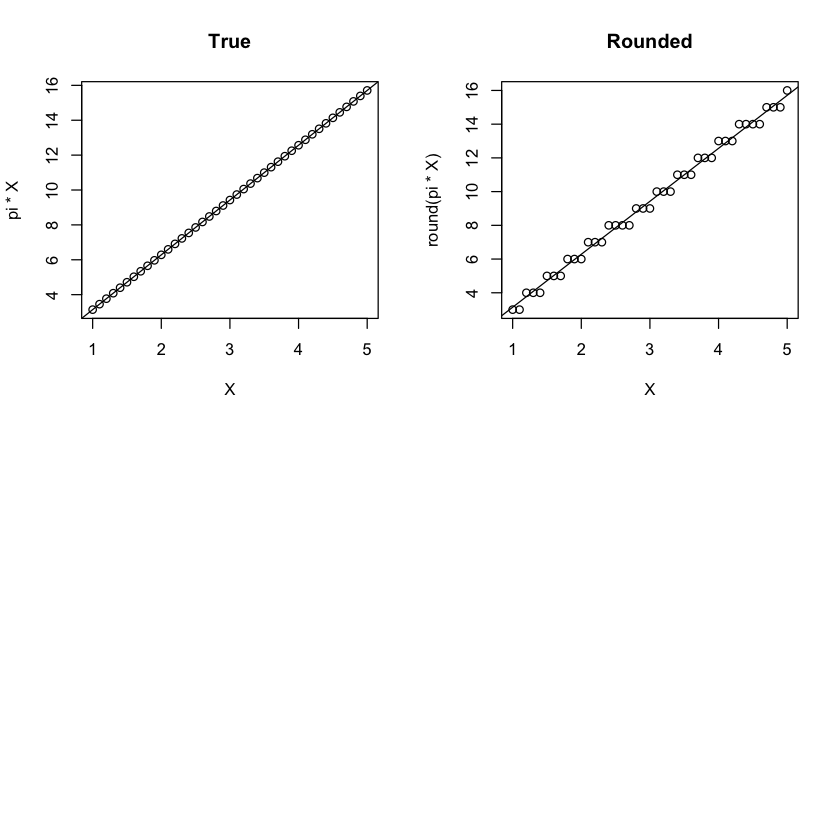

In [6]:
# Make a plot
par(mfrow = c(2,2))
plot(x = X, y = pi*X, main = 'True')
abline(a = 0, b = pi)
plot(x = X, y = round(pi*X), main = 'Rounded')
abline(a = 0, b = pi)

##### First let's see whether $\mathbb{E}(\epsilon)\rightarrow0$

In [7]:
set.seed(423)
n <- 1e1
X1 <- runif(n, min = 0, max = 10)
Y1 <- round(pi*X1)
epsilon.bar <- mean(Y1 - X1*pi); epsilon.bar

[1] -0.04886709

In [8]:
set.seed(423)
n <- 1e3
X3 <- runif(n, min = 0, max = 10)
Y3 <- round(pi*X3)
epsilon.bar <- mean(Y3 - X3*pi); epsilon.bar

[1] -0.02692308

In [9]:
set.seed(423)
n <- 1e5
X5 <- runif(n, min = 0, max = 10)
Y5 <- round(pi*X5)
epsilon.bar <- mean(Y5 - X5*pi); epsilon.bar

[1] -0.002977085

#####  Let's see whether linear regression results $\rightarrow \pi$

In [10]:
options(digits = 22)
lm(Y1~X1)


Call:
lm(formula = Y1 ~ X1)

Coefficients:
           (Intercept)                      X1  
-0.3623855227395451628   3.1961637902235433550  


In [11]:
lm(Y3~X3)


Call:
lm(formula = Y3 ~ X3)

Coefficients:
            (Intercept)                       X3  
-0.01378766221698295331   3.13890183872670913701  


In [12]:
lm(Y5~X5)


Call:
lm(formula = Y5 ~ X5)

Coefficients:
             (Intercept)                        X5  
-0.002086774429252433519   3.141414775777203072238  


## Move on to Prof. Yang's notes
#### We will learn linear regression, simulation, writing <tt>R</tt> functions and plotting in <tt>R</tt>.
##### 1. $\epsilon$ from a $t$ distribution

In [13]:
func.name <- function(arguments) {
    statements
}

In [14]:
square <- function(x) {
    x^2
}

In [15]:
mypower <- function(x, y) {
    XtoY <- x^y
    YtoX <- y^x
    return(list(XtothepowerofY = XtoY,
                YtotheposerofX = YtoX))
}

In [16]:
result <- mypower(x = 2, y = 3)
str(result)

List of 2
 $ XtothepowerofY: num 8
 $ YtotheposerofX: num 9


In [17]:
result$XtothepowerofY

[1] 8

In [18]:
result$YtotheposerofX

[1] 9

In [19]:
square(5)

[1] 25

In [20]:
sim.linmod <- function(n, beta.0, beta.1, width, df) {
    # draw n points from a uniform distribution
    # centered on 0
    x <- runif(n, min = -width/2, max = width/2)
    # draw n points from a t distribution with the
    # given number of degrees of freedom
    epsilon <- rt(n, df = df)
    # make y from a linear model
    y <- beta.0 + beta.1 * x + epsilon
    # return the data frame
    return(data.frame(x = x, y = y))
}

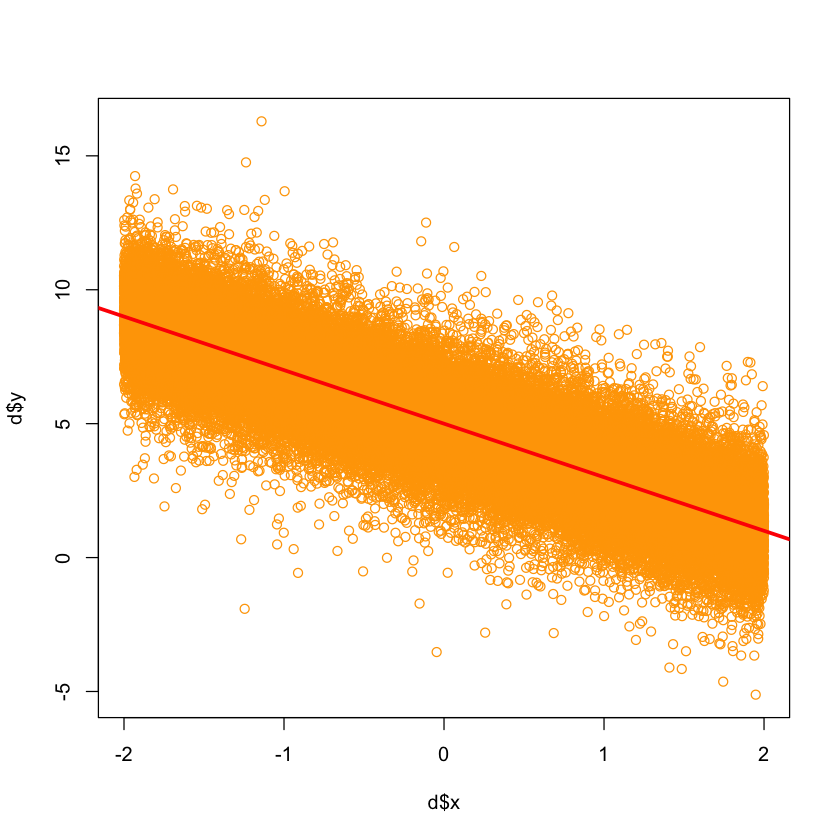

In [21]:
# Sample 100000 observations from the model and
# plot the distribution of (X,Y)
set.seed(1)
# sample the data
d = sim.linmod(n = 1e+05, beta.0 = 5, beta.1 = -2,
               width = 4, df = 8)
# d
# plot the points
plot(x = d$x, y = d$y, col = "orange")
# plot the true regression line
abline(a = 5, b = -2, lwd = 3, col = "red")


Call:
lm(formula = y ~ x, data = d1)

Coefficients:
          (Intercept)                      x  
 5.055610572078177434  -2.517657750119903781  


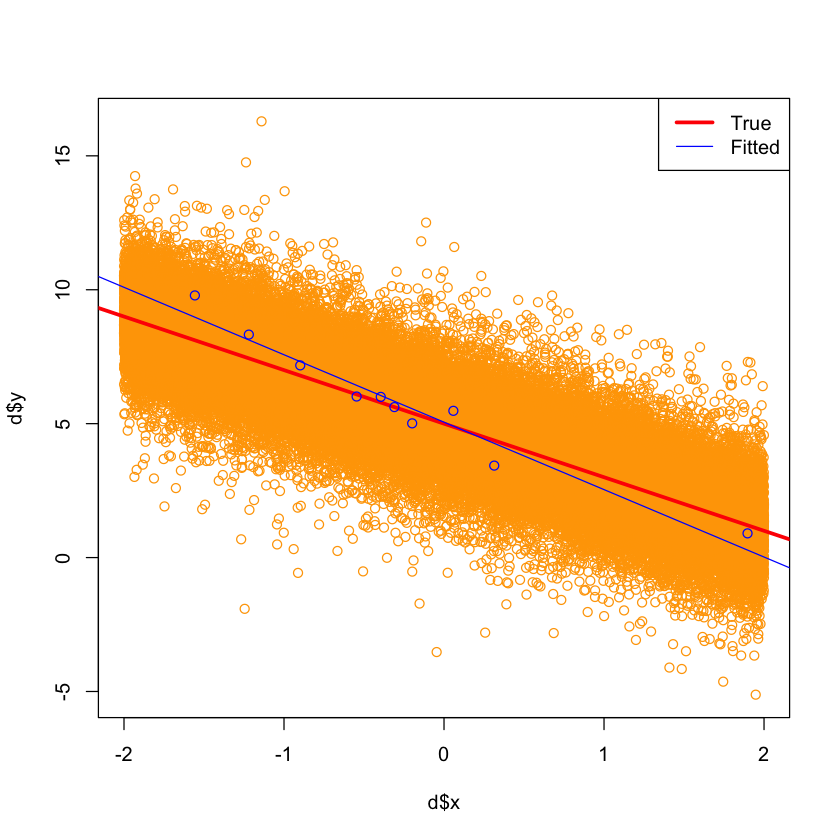

In [22]:
plot(x = d$x, y = d$y, col = "orange")
# plot the true regression line
abline(a = 5, b = -2, lwd = 3, col = "red")
# Sample 10 observations from the model and fit
# regression line using least squares
rm(.Random.seed)
# sample the data
d1 = sim.linmod(n = 10, beta.0 = 5, beta.1 = -2,
                width = 4, df = 8)
# plot the data
points(x = d1$x, y = d1$y, col = "blue")
# Add legend
# plot the fitted regression line using least squares
m = lm(y ~ x, data = d1); m
abline(m, col = "blue")
legend("topright", legend = c("True", "Fitted"),
       col = c("red", "blue"), lty = c(1, 1), lwd = c(3, 1))

##### 2. $\epsilon$ from a gamma distribution

In [23]:
sim.linmod <- function(n, beta.0, beta.1, width, shape, scale) {
    # draw n points from a uniform distribution
    # centered on 0
    x <- runif(n, min = -width/2, max = width/2)
    # draw n points from a t distribution with the
    # given number of degrees of freedom
    epsilon <- rgamma(n, shape = shape, scale = scale) -
               shape*scale
    # make y from a linear model
    y <- beta.0 + beta.1 * x + epsilon
    # return the data frame
    return(data.frame(x = x, y = y))
}

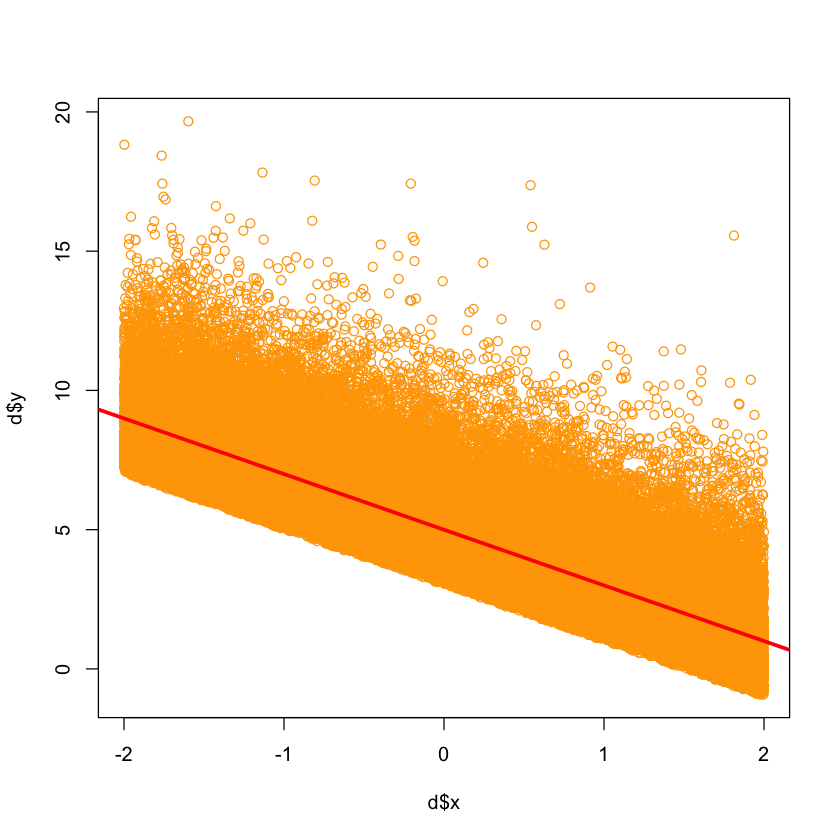

In [24]:
# Sample 100000 observations from the model and
# plot the distribution of (X,Y)
set.seed(1)
# sample the data
d = sim.linmod(n = 1e+05, beta.0 = 5, beta.1 = -2,
               width = 4, shape = 2, scale = 1)
# plot the points
plot(x = d$x, y = d$y, col = "orange")
# plot the true regression line
abline(a = 5, b = -2, lwd = 3, col = "red")


Call:
lm(formula = y ~ x, data = d1)

Coefficients:
          (Intercept)                      x  
 5.059486118333050619  -2.321277539982132598  


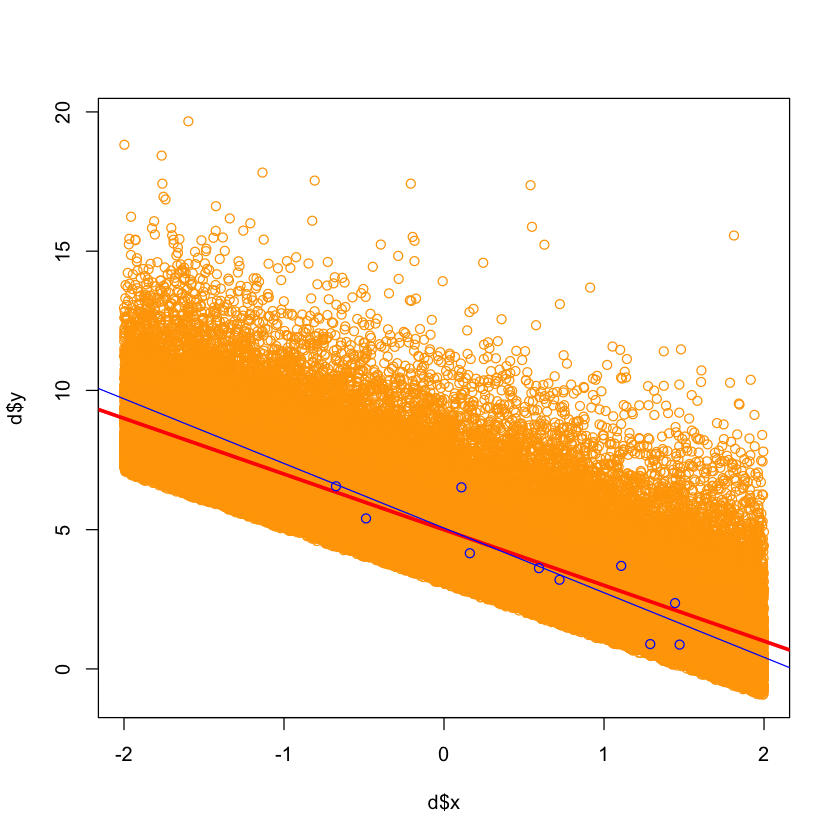

In [25]:
plot(x = d$x, y = d$y, col = "orange")
# plot the true regression line
abline(a = 5, b = -2, lwd = 3, col = "red")
# Sample 10 observations from the model and fit
# regression line using least squares
rm(.Random.seed)
# sample the data
d1 = sim.linmod(n = 10, beta.0 = 5, beta.1 = -2,
                width = 4, shape = 2, scale = 1)
# plot the data
points(x = d1$x, y = d1$y, col = "blue")
# plot the fitted regression line using least squares
m = lm(y ~ x, data = d1); m
abline(m, col = "blue")